In [132]:
import pandas as pd
import os
import datetime
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import climetlab as cml
import cfgrib


In [133]:
data_dir = '/Users/user/Documents_stuff/Ashoka/Capstone_Project/code/ai-models/data/forecast_data/'
fcn_dir = '/Users/user/Documents_stuff/Ashoka/Capstone_Project/code/ai-models/data/forecast_data/fourcastnet/init20220101-lead48-t00-fcn'
pangu_dir = '/Users/user/Documents_stuff/Ashoka/Capstone_Project/code/ai-models/data/forecast_data/pangu/init20220101-lead48-t00-pangu'

In [134]:
pangu0 = f"{pangu_dir}/out-pangu-0.grib"
pangu6 = f"{pangu_dir}/out-pangu-6.grib"
fcn0 = f"{fcn_dir}/out-fcn-0.grib"

In [157]:
def extract_temp_level500_new(dataset):
    ds = cfgrib.open_datasets(dataset)
    ds_temp = next(var for var in ds if 't' in var.data_vars)['t']
    ds_temp_500 = ds_temp.sel(isobaricInhPa='500')
    return ds_temp_500

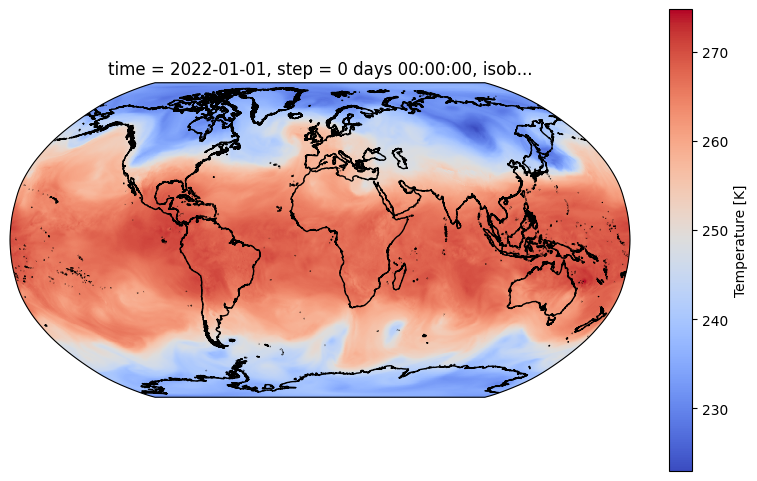

In [128]:
import cartopy.crs as ccrs
import cartopy

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines(resolution="10m")
plot = ds[5]['t'].sel(isobaricInhPa='500').plot(
    cmap=plt.cm.coolwarm, transform=ccrs.PlateCarree(), cbar_kwargs={"shrink": 0.6}
)

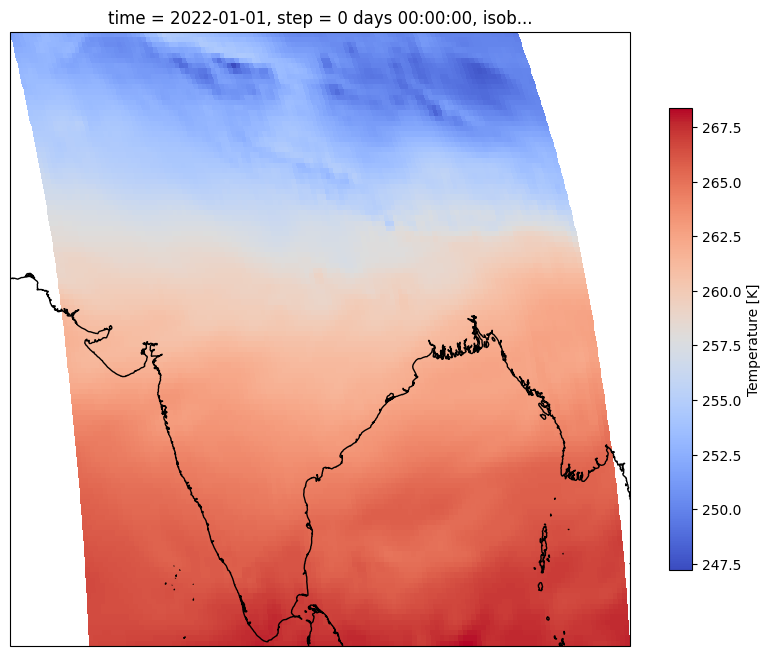

In [ ]:
import cartopy.crs as ccrs
import cartopy

# Define the bounding box for the Indian region
lat_min, lat_max = 8.0, 37.0
lon_min, lon_max = 68.0, 97.0

# Select data over the Indian region
indian_region = ds[5]['t'].sel(
    latitude=slice(lat_max, lat_min),
    longitude=slice(lon_min, lon_max),
    isobaricInhPa=500
)

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines(resolution="10m")
plot = indian_region.plot(
    cmap=plt.cm.coolwarm, transform=ccrs.PlateCarree(), cbar_kwargs={"shrink": 0.6}
)

In [ ]:
fcn0_temp_level500 = ds['t'].isel(isobaricInhPa=1)

In [92]:
data_filename = pangu6
data_nc = data_filename.replace('.grib', '.nc')
ds = xr.load_dataset(data_filename, engine='cfgrib')
ds_t_level500 = ds['t'].sel(isobaricInhPa='500')
# ds_t_level500 = ds_t_level500.to_netcdf(data_nc)
ds_t_level500

skipping variable: paramId==167 shortName='t2m'
Traceback (most recent call last):
  File "/Users/user/miniconda3/lib/python3.9/site-packages/cfgrib/dataset.py", line 721, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/Users/user/miniconda3/lib/python3.9/site-packages/cfgrib/dataset.py", line 639, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=10.0) new_value=Variable(dimensions=(), data=2.0)


<xarray.DataArray 't' (latitude: 721, longitude: 1440)> Size: 4MB
array([[235.58984, 235.59766, 235.63184, ..., 235.50684, 235.56445,
        235.58984],
       [235.54785, 235.51367, 235.53613, ..., 235.41797, 235.46777,
        235.49219],
       [235.46875, 235.41309, 235.3877 , ..., 235.33105, 235.33398,
        235.35254],
       ...,
       [236.56152, 236.55762, 236.54492, ..., 236.48926, 236.49902,
        236.51465],
       [236.41895, 236.41797, 236.39941, ..., 236.31445, 236.31934,
        236.3457 ],
       [250.08398, 249.53125, 249.12305, ..., 249.95117, 249.43164,
        249.06836]], dtype=float32)
Coordinates:
    time               datetime64[ns] 8B 2022-01-01
    step               timedelta64[ns] 8B 06:00:00
    isobaricInhPa      float64 8B 500.0
  * latitude           (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude          (longitude) float64 12kB 0.0 0.25 0.5 ... 359.5 359.8
    valid_time         datetime64[ns] 8B 2022-01-01T06:00:00
    meanSea            float64 8B 0.0
    heightAboveGround  float64 8B 10.0
Attributes: (12/30)
    GRIB_paramId:                             130
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                Temperature
    GRIB_shortName:                           t
    GRIB_units:                               K
    long_name:                                Temperature
    units:                                    K
    standard_name:                            air_temperature

In [158]:
test_pangu = extract_temp_level500_new(pangu6)
test_pangu

<xarray.DataArray 't' (latitude: 721, longitude: 1440)> Size: 4MB
[1038240 values with dtype=float32]
Coordinates:
    time           datetime64[ns] 8B 2022-01-01
    step           timedelta64[ns] 8B 06:00:00
    isobaricInhPa  float64 8B 500.0
  * latitude       (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude      (longitude) float64 12kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
    valid_time     datetime64[ns] 8B 2022-01-01T06:00:00
Attributes: (12/30)
    GRIB_paramId:                             130
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                Temperature
    GRIB_shortName:                           t
    GRIB_units:                               K
    long_name:                                Temperature
    units:                                    K
    standard_name:                            air_temperature

In [163]:
test_fcn = extract_temp_level500_new(fcn0)
test_fcn

<xarray.DataArray 't' (latitude: 721, longitude: 1440)> Size: 4MB
[1038240 values with dtype=float32]
Coordinates:
    time           datetime64[ns] 8B 2022-01-01
    step           timedelta64[ns] 8B 00:00:00
    isobaricInhPa  float64 8B 500.0
  * latitude       (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude      (longitude) float64 12kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
    valid_time     datetime64[ns] 8B ...
Attributes: (12/30)
    GRIB_paramId:                             130
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                Temperature
    GRIB_shortName:                           t
    GRIB_units:                               K
    long_name:                                Temperature
    units:                                    K
    standard_name:                            air_temperature

In [ ]:
pangu_df = extract_temp_level500_new(pangu0)
for i in range(6, 50, 6):
    pangu_df_temp = extract_temp_level500_new(f"{pangu_dir}/out-pangu-{i}.grib")
    pangu_df = xr.concat([pangu_df, pangu_df_temp], dim="step")
    del pangu_df_temp
pangu_df
pangu_df.to_netcdf(f"{pangu_dir}/out-pangu-all.nc")

In [ ]:
fcn_df = extract_temp_level500_new(fcn0)
for i in range(6, 50, 6):
    fcn_df_temp = extract_temp_level500_new(f"{fcn_dir}/out-FCN-{i}.grib")
    fcn_df = xr.concat([fcn_df, fcn_df_temp], dim="step")
    del fcn_df_temp
fcn_df
fcn_df.to_netcdf(f"{fcn_dir}/out-FCN-all.nc")

In [42]:
import xarray as xr
import matplotlib.pyplot as plt

pangu_df = xr.open_dataset(f"{pangu_dir}/out-pangu-all.nc")
pangu_df
fcn_df = xr.open_dataset(f"{fcn_dir}/out-FCN-all.nc")
pangu_df

<xarray.Dataset> Size: 37MB
Dimensions:            (time: 1, step: 9, heightAboveGround: 1, latitude: 721,
                        longitude: 1440)
Coordinates:
  * time               (time) datetime64[ns] 8B 2022-01-01
  * step               (step) timedelta64[ns] 72B 0 days 00:00:00 ... 2 days ...
  * heightAboveGround  (heightAboveGround) float64 8B 2.0
  * latitude           (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude          (longitude) float64 12kB 0.0 0.25 0.5 ... 359.5 359.8
    valid_time         (time, step) datetime64[ns] 72B ...
Data variables:
    t2m                (time, step, heightAboveGround, latitude, longitude) float32 37MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-01T10:06 GRIB to CDM+CF via cfgrib-0.9.1...

In [43]:
def graph_india(dataset):
    lat_min, lat_max = 8.0, 37.0
    lon_min, lon_max = 68.0, 97.0


    indian_region = dataset.sel(
        latitude=slice(lat_max, lat_min),
        longitude=slice(lon_min, lon_max)
    )


    t2m_avg = indian_region.t2m.mean(dim=["latitude", "longitude", "heightAboveGround"])


    plt.figure(figsize=(10, 6))
    t2m_avg.plot.line(
        x="valid_time", 
        marker="o", 
        linestyle='--', 
        label="Forecasted Temperature (K)", 
        color="blue"
    )

    plt.title("Forecasted Temperature Over Time for the Indian Region")
    plt.xlabel("Time")
    plt.ylabel("Temperature (K)")
    plt.grid(True)
    plt.legend()
    plt.show()
    plt.clf()


def maps_india(dataset):
    lat_min, lat_max = 8.0, 37.0
    lon_min, lon_max = 68.0, 97.0


    indian_region = dataset.sel(
        latitude=slice(lat_max, lat_min),
        longitude=slice(lon_min, lon_max)
    )
    time_steps = indian_region.step.values
    for step in time_steps:
        plt.figure(figsize=(8, 6))
        indian_region_at_step = indian_region.sel(step=step)
        indian_region_at_step_mean = indian_region_at_step.t2m.mean(dim="heightAboveGround")
        mappable = indian_region_at_step_mean.plot(cmap="coolwarm")
        # convert step which is a numpy.timedelta thing, to hours from nanoseconds
        step = int(step.item() / 3.6e+12)

        plt.title(f"Forecasted Temperature (K) at +{step} hours")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.colorbar(mappable, label="Temperature (K)")
        plt.grid(True)
        plt.show()
    

In [ ]:
graph_india(pangu_df)
maps_india(pangu_df)


In [ ]:
graph_india(fcn_df)
maps_india(fcn_df)

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
from pathlib import Path

# List of GRIB files
grib_files = [
    "out-pangu-0.grib", "out-pangu-6.grib", "out-pangu-12.grib",
    "out-pangu-18.grib", "out-pangu-30.grib", "out-pangu-36.grib",
    "out-pangu-42.grib", "out-pangu-48.grib"
]

# append pangu_dir to each file
grib_files = [f"{pangu_dir}/{file}" for file in grib_files]

# Combine datasets
datasets = []
for file in grib_files:
    ds = xr.open_dataset(file, engine="cfgrib")
    datasets.append(ds)

# Concatenate along the step dimension
combined = xr.concat(datasets, dim="step")

# Define the bounding box for the Indian region
lat_min, lat_max = 8.0, 37.0
lon_min, lon_max = 68.0, 97.0

# Select data over the Indian region
indian_region = combined.sel(
    latitude=slice(lat_max, lat_min),  # Latitude values typically decrease
    longitude=slice(lon_min, lon_max)
)

# Average temperature over the Indian region
t2m_avg = indian_region.t2m.mean(dim=["latitude", "longitude", "heightAboveGround"])

# Plot the forecasted temperature over time
plt.figure(figsize=(10, 6))
t2m_avg.plot.line(x="valid_time", marker="o", label="Forecasted Temperature (°C)")

plt.title("Forecasted Temperature Over Time for the Indian Region")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.show()


skipping variable: paramId==167 shortName='t2m'
Traceback (most recent call last):
  File "/Users/user/miniconda3/lib/python3.9/site-packages/cfgrib/dataset.py", line 721, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/Users/user/miniconda3/lib/python3.9/site-packages/cfgrib/dataset.py", line 639, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=10.0) new_value=Variable(dimensions=(), data=2.0)
skipping variable: paramId==167 shortName='t2m'
Traceback (most recent call last):
  File "/Users/user/miniconda3/lib/python3.9/site-packages/cfgrib/dataset.py", line 721, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/Users/user/miniconda3/lib/python3.9/site-packages/cfgrib/dataset.py", line 639, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key

AttributeError: 'Dataset' object has no attribute 't2m'

<xarray.Dataset> Size: 4MB
Dimensions:            (time: 1, step: 1, heightAboveGround: 1, latitude: 721,
                        longitude: 1440)
Coordinates:
  * time               (time) datetime64[ns] 8B 2022-01-01
  * step               (step) timedelta64[ns] 8B 06:00:00
  * heightAboveGround  (heightAboveGround) float64 8B 2.0
  * latitude           (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude          (longitude) float64 12kB 0.0 0.25 0.5 ... 359.5 359.8
    valid_time         (time, step) datetime64[ns] 8B ...
Data variables:
    t2m                (time, step, heightAboveGround, latitude, longitude) float32 4MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-01

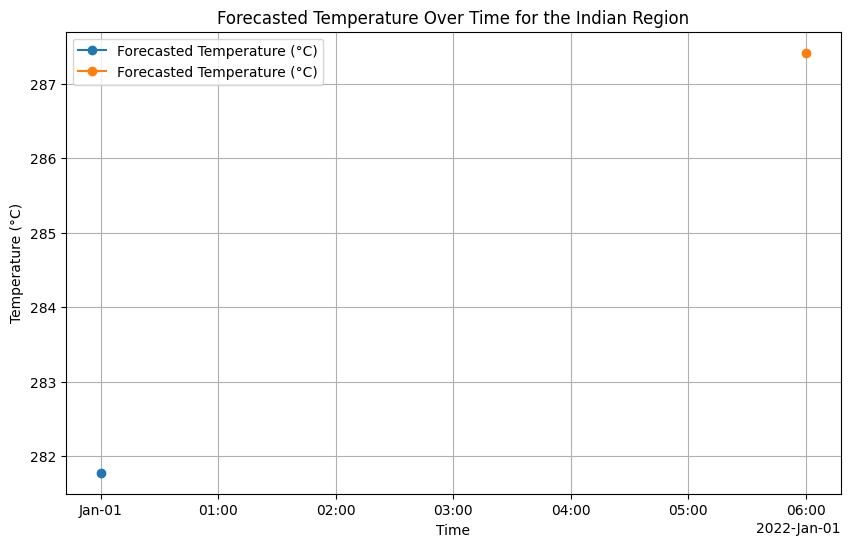

In [ ]:
import matplotlib.pyplot as plt

# Load the forecast datasets (replace with actual file paths or data sources)


# Combine the two datasets along the 'step' dimension
combined = xr.concat([pangu0_df, pangu6_df], dim="step")

# Define the bounding box for the Indian region
lat_min, lat_max = 8.0, 37.0
lon_min, lon_max = 68.0, 97.0

# Select data over the Indian region
indian_region = combined.sel(
    latitude=slice(lat_max, lat_min),  # Latitude values typically decrease
    longitude=slice(lon_min, lon_max)
)

# Average temperature over the Indian region
t2m_avg = indian_region.t2m.mean(dim=["latitude", "longitude", "heightAboveGround"])

# Plot the forecasted temperature over time
plt.figure(figsize=(10, 6))
t2m_avg.plot.line(x="valid_time", marker="o", label="Forecasted Temperature (°C)")

plt.title("Forecasted Temperature Over Time for the Indian Region")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
fcn0 = convert(f"{fcn_dir}/out-fcn-0.grib")
fcn0

<xarray.Dataset> Size: 4MB
Dimensions:            (time: 1, step: 1, heightAboveGround: 1, latitude: 721,
                        longitude: 1440)
Coordinates:
  * time               (time) datetime64[ns] 8B 2022-01-01
  * step               (step) timedelta64[ns] 8B 00:00:00
  * heightAboveGround  (heightAboveGround) float64 8B 2.0
  * latitude           (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude          (longitude) float64 12kB 0.0 0.25 0.5 ... 359.5 359.8
    valid_time         (time, step) datetime64[ns] 8B ...
Data variables:
    t2m                (time, step, heightAboveGround, latitude, longitude) float32 4MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-01T10:07 GRIB to CDM+CF via cfgrib-0.9.1...

In [ ]:
fcn6 = convert(f"{fcn_dir}/out-fcn-6.grib")
fcn6

<xarray.Dataset> Size: 4MB
Dimensions:            (time: 1, step: 1, heightAboveGround: 1, latitude: 721,
                        longitude: 1440)
Coordinates:
  * time               (time) datetime64[ns] 8B 2022-01-01
  * step               (step) timedelta64[ns] 8B 06:00:00
  * heightAboveGround  (heightAboveGround) float64 8B 2.0
  * latitude           (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude          (longitude) float64 12kB 0.0 0.25 0.5 ... 359.5 359.8
    valid_time         (time, step) datetime64[ns] 8B ...
Data variables:
    t2m                (time, step, heightAboveGround, latitude, longitude) float32 4MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-01T10:07 GRIB to CDM+CF via cfgrib-0.9.1...